In [25]:
import yfinance as yf
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
import numpy as np

warnings.filterwarnings('ignore')

In [5]:
IBM_Walmart = yf.download(tickers='IBM WMT', period='5y', interval='1mo', rounding=True)
IBM_Walmart = IBM_Walmart['Close']
IBM_Walmart

[*********************100%***********************]  2 of 2 completed


Ticker,IBM,WMT
Date,,
2020-04-01,95.48,37.76
2020-05-01,94.98,38.54
2020-06-01,93.07,37.37
2020-07-01,94.75,40.37
2020-08-01,95.03,43.32
2020-09-01,95.00,43.83
2020-10-01,87.18,43.47
2020-11-01,96.44,47.86
2020-12-01,99.71,45.16


<function matplotlib.pyplot.show(close=None, block=None)>

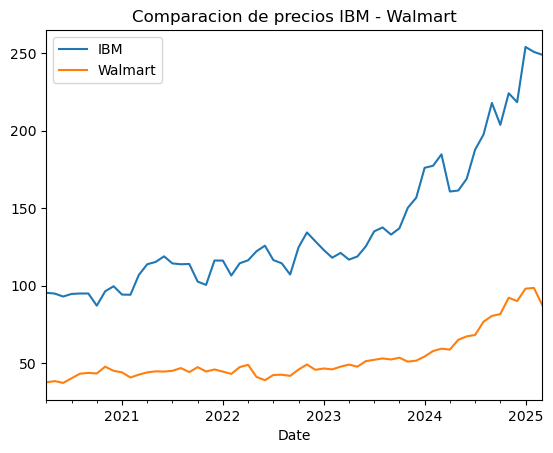

In [7]:
IBM_Walmart['IBM'].plot()
IBM_Walmart['WMT'].plot()
plt.legend(['IBM', 'Walmart'])
plt.title('Comparacion de precios IBM - Walmart')
plt.show

La comparacion de precios entre las dos compañias muestran una tendencia similar, al no estar completamente relacionadas las compañias podria haber una influencia de una sobre la otra 

In [8]:
rend_IBM_WMT = IBM_Walmart.pct_change()
rend_IBM_WMT = rend_IBM_WMT.dropna()
rend_IBM_WMT

Ticker,IBM,WMT
Date,,
2020-05-01,-0.005237,0.020657
2020-06-01,-0.020109,-0.030358
2020-07-01,0.018051,0.080278
2020-08-01,0.002955,0.073074
2020-09-01,-0.000316,0.011773
2020-10-01,-0.082316,-0.008214
2020-11-01,0.106217,0.100989
2020-12-01,0.033907,-0.056415
2021-01-01,-0.053856,-0.021922


In [10]:
correlacion = rend_IBM_WMT['IBM'].corr(rend_IBM_WMT['WMT'])
print("Correlacion entre IBM y Walmart: ", correlacion)

Correlacion entre IBM y Walmart:  0.344560245691146


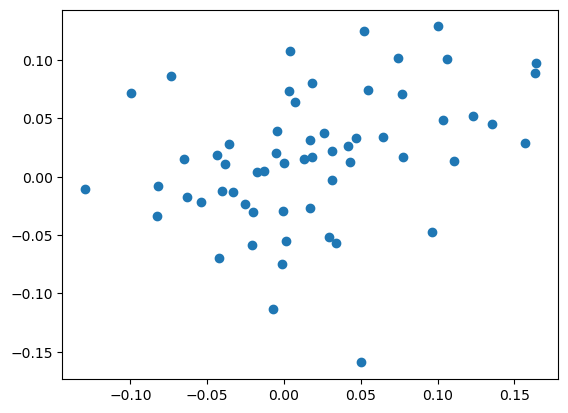

In [11]:
plt.scatter(rend_IBM_WMT['IBM'], rend_IBM_WMT['WMT'])
plt.show()

Podemos observar que existe una correlacion muy debil entre las dos compañias y el diagrama de dispercion no muestra una relacion clara

In [17]:
rend_IBM_WMT = sm.add_constant(rend_IBM_WMT)
regresion = sm.OLS(rend_IBM_WMT['IBM'],rend_IBM_WMT['WMT']).fit()
print(regresion.summary())

                                 OLS Regression Results                                
Dep. Variable:                    IBM   R-squared (uncentered):                   0.154
Model:                            OLS   Adj. R-squared (uncentered):              0.139
Method:                 Least Squares   F-statistic:                              10.55
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                     0.00194
Time:                        16:45:33   Log-Likelihood:                          79.588
No. Observations:                  59   AIC:                                     -157.2
Df Residuals:                      58   BIC:                                     -155.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
autocorrelacion = IBM_Walmart['IBM'].autocorr()
autocorrelacion

0.9748481440045719

In [23]:
autocorrelacion = IBM_Walmart['WMT'].autocorr()
autocorrelacion

0.9753409082558028

Podemos intuir que los valores pasados tienen mucha influencia en valores futuros

Realizamos la prueba Dickey-Fuller para ambas compañias para saber si las series tienen un proceso de caminata aleatoria
H0: Se tiene un proceso de caminata aleatoria
Ha: No se tiene un proceso de caminata aleatoria

In [27]:
DF_Test = adfuller(IBM_Walmart['IBM'])
print("El valor p de la prueba para IBM es: " + str(DF_Test[1]))

El valor p de la prueba para IBM es: 0.9988578111993742


In [28]:
DF_Test = adfuller(IBM_Walmart['WMT'])
print("El valor p de la prueba para WMT es: " + str(DF_Test[1]))

El valor p de la prueba para WMT es: 0.9620919729630205


El valor para ambas compañias muestra que podemos rechazar la H0, por lo que no son estacionarias y siguen una tendencia o caminata aleatoria

In [42]:
IBM_Walmart_d = yf.download(tickers='IBM WMT', period='5y', interval='1d', rounding=True)
IBM_Walmart_d = IBM_Walmart_d['Close']
IBM_Walmart_d

[*********************100%***********************]  2 of 2 completed


Ticker,IBM,WMT
Date,,
2020-03-12,78.18,32.18
2020-03-13,82.09,35.29
2020-03-16,75.35,33.02
2020-03-17,81.10,36.88
2020-03-18,78.75,37.91
...,...,...
2025-03-05,251.35,95.98
2025-03-06,248.69,94.64
2025-03-07,261.54,91.72


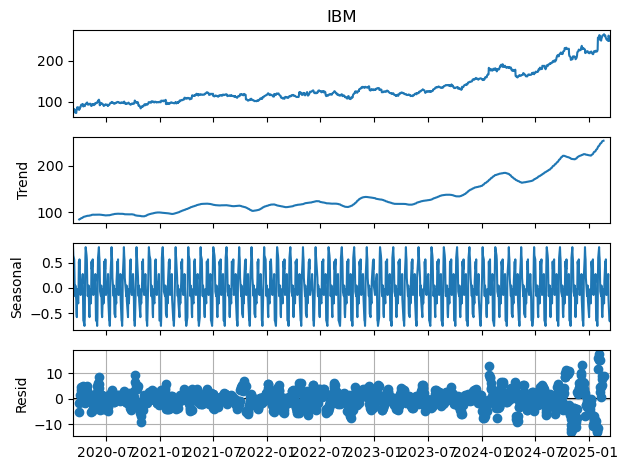

In [43]:
IBM = IBM_Walmart_d['IBM'].squeeze()
decomposed_IBM = sm.tsa.seasonal_decompose(IBM, period=30)

figure = decomposed_IBM.plot()
plt.grid()
plt.show()

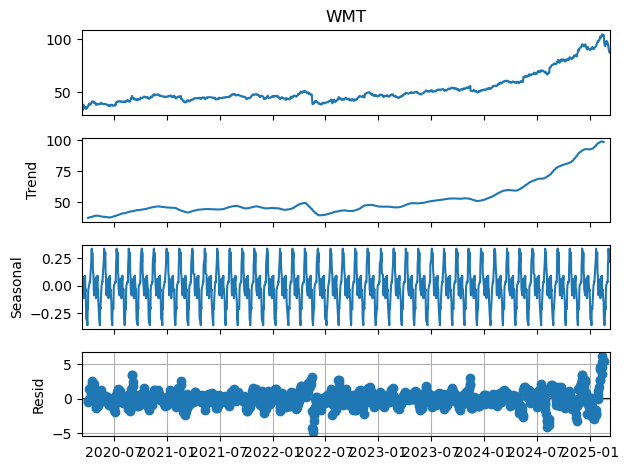

In [44]:
WMT = IBM_Walmart_d['WMT'].squeeze()
decomposed_WMT = sm.tsa.seasonal_decompose(WMT, period=30)

figure = decomposed_WMT.plot()
plt.grid()
plt.show()

Podemos observar como en ambas compañias la tendencia y estacionalidad se comportan de forma similar y en el caso de la tendencia, se muestra acorde a el valor de los precios a lo largo del tiempo

In [65]:
IBM.shape

(1256,)

In [66]:
IBM_len_train = int(1256*0.8)
IBM_len_train

1004

In [68]:
IBM_train = IBM[0:1004]
IBM_test = IBM[1004:]
print("Train: ", len(IBM_train), "Test: ", len(IBM_test))

Train:  1004 Test:  252


In [71]:
y_pred_IBM = IBM.copy()
y_pred_IBM = pd.DataFrame(y_pred_IBM)
y_pred_IBM['pronostico'] = IBM.rolling(30).mean()

y_pred_m = y_pred_IBM.copy()
y_pred_m['pronostico'][29] = 'NaN'
for contador in range(30,1256):
    y_pred_m['pronostico'][contador]=y_pred_IBM['pronostico'][contador-1]
y_pred_m = pd.DataFrame(y_pred_m['pronostico'][1004:])
y_pred_m

,pronostico
Date,
2024-03-08,179.947
2024-03-11,180.180333
2024-03-12,180.374
2024-03-13,180.771667
2024-03-14,181.111
...,...
2025-03-05,249.367
2025-03-06,250.319333
2025-03-07,251.216333


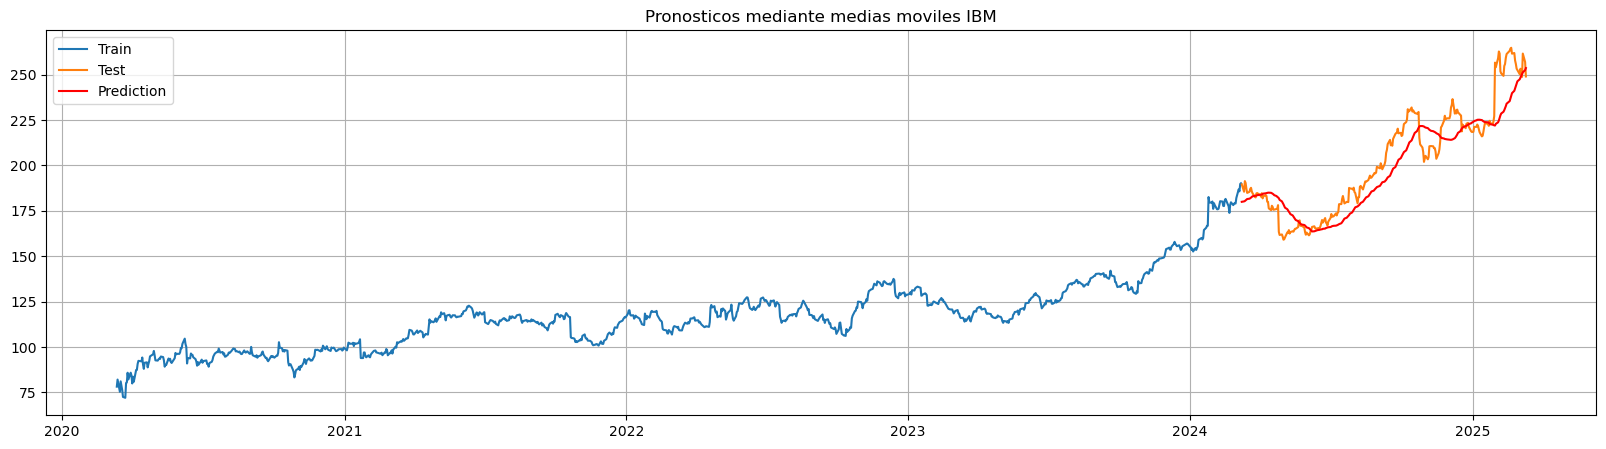

In [73]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(IBM_train, label="Train")
plt.plot(IBM_test, label="Test")
plt.plot(y_pred_m['pronostico'], label="Prediction", color='red')
plt.legend(loc="best")
plt.title("Pronosticos mediante medias moviles IBM")
plt.show()

In [75]:
# Pronostico para el dia siguiente
print("El pronostico para el dia siguiente es de: ", y_pred_IBM.tail(1)['pronostico'])

El pronostico para el dia siguiente es de:  Date
2025-03-11    254.446
Name: pronostico, dtype: float64


In [76]:
WMT.shape

(1256,)

In [77]:
WMT_len_train = int(1256*0.8)
WMT_len_train

1004

In [78]:
WMT_train = WMT[0:1004]
WMT_test = WMT[1004:]
print("Train: ", len(WMT_train), "Test: ", len(WMT_test))

Train:  1004 Test:  252


In [79]:
y_pred_WMT = WMT.copy()
y_pred_WMT = pd.DataFrame(y_pred_WMT)
y_pred_WMT['pronostico'] = WMT.rolling(30).mean()

y_pred_w = y_pred_WMT.copy()
y_pred_w['pronostico'][29] = 'NaN'
for contador in range(30,1256):
    y_pred_w['pronostico'][contador]=y_pred_WMT['pronostico'][contador-1]
y_pred_w = pd.DataFrame(y_pred_w['pronostico'][1004:])
y_pred_w

,pronostico
Date,
2024-03-08,56.707667
2024-03-11,56.9
2024-03-12,57.094333
2024-03-13,57.305
2024-03-14,57.505333
...,...
2025-03-05,98.801
2025-03-06,98.897667
2025-03-07,98.944667


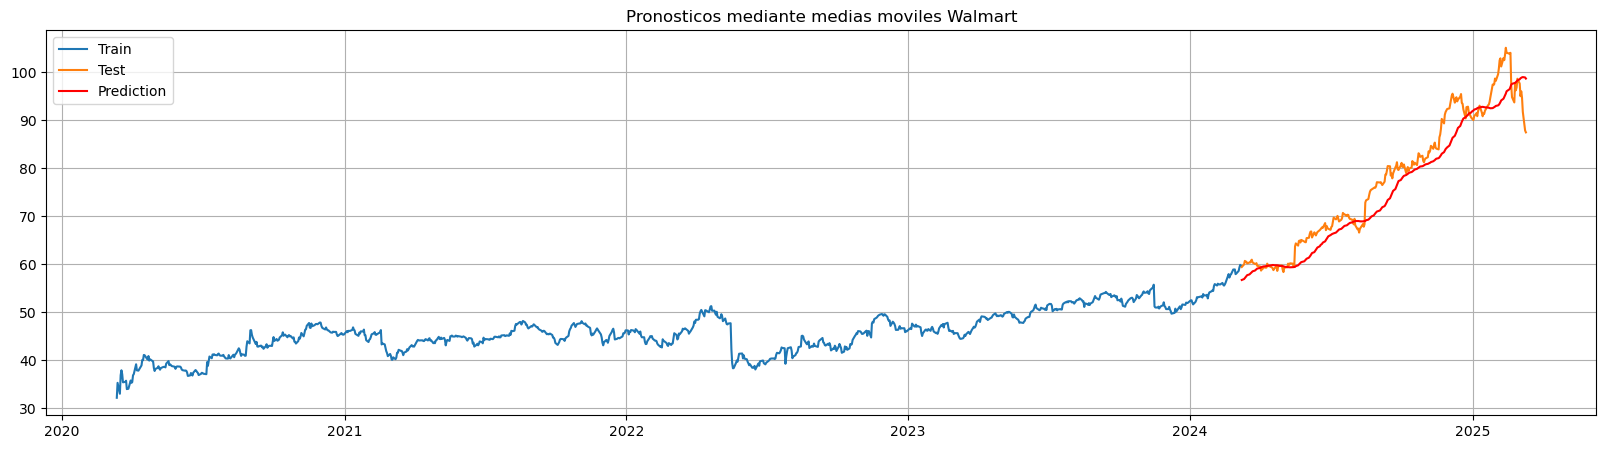

In [81]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(WMT_train, label="Train")
plt.plot(WMT_test, label="Test")
plt.plot(y_pred_w['pronostico'], label="Prediction", color='red')
plt.legend(loc="best")
plt.title("Pronosticos mediante medias moviles Walmart")
plt.show()

In [82]:
# Pronostico para el dia siguiente walmart
print("El pronostico para el dia siguiente es de: ", y_pred_WMT.tail(1)['pronostico'])

El pronostico para el dia siguiente es de:  Date
2025-03-11    98.311667
Name: pronostico, dtype: float64
